In [1]:
import matplotlib as mpl
# mpl.use('pgf')
from matplotlib import pyplot as plt
# pgf_with_latex = {
#         'text.usetex': False,
#         'pgf.rcfonts': False,
#         "pgf.preamble": [
#                 r"\usepackage{siunitx}"
#                 ]
# }
# mpl.rcParams.update(pgf_with_latex)

In [2]:
from simulation import run_annotation_simulation_lemma

In [3]:
split = 'test'
dataset = 'ecb'

In [4]:
ecb_results = run_annotation_simulation_lemma('ecb', split, ns=[i/2 for i in range(2,40)])

Total mention pairs in the Test set: 93878


Generating Similarities: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 93878/93878 [00:00<00:00, 272206.06it/s]


In [5]:
gvc_results = run_annotation_simulation_lemma('gvc', split)

Total mention pairs in the Test set: 18961


Generating Similarities: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18961/18961 [00:00<00:00, 185565.98it/s]


In [6]:
_, ecb_comparisons, ecb_recall, _ = zip(*ecb_results)
_, gvc_comparisons, gvc_recall, _ = zip(*gvc_results)

In [73]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])
#     print(fig_height_in)
    return (fig_width_in, fig_height_in+0.7)

In [78]:
(455.24411/72.27 )/2

3.1496064065310643

In [74]:
width = 455.24411

Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Courier New
Ignoring unknown font: Courier New
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New 

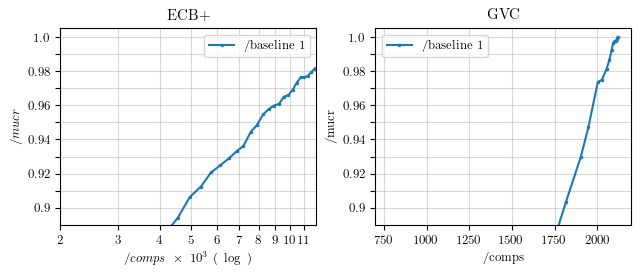

In [82]:
# plt.ioff()
plt.rcParams["pgf.texsystem"] = "pdflatex"
# plt.rcParams['figure.figsize'] = [12, 5.5]
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 9
plt.rcParams["font.family"] = "Times New Roman"
fig, axes = plt.subplots(1,2, figsize=set_size(width, fraction=1, subplots=(1,2)), constrained_layout=True)
# fig.subplots_adjust(wspace=0.2)
# ax.plot(comparisons_cdlm_t[3:-7], recalls_cdlm_t[3:-7], '-.o', markersize=3, label='CDLM-T')
# ax.plot(comparisons_cdlm_nt[3:-7], recalls_cdlm_nt[3:-7], '-.o', markersize=3, label='CDLM')

courier= {'fontname':'Courier New'}
# courier= {'fontname':'Courier'}
csfont = {'fontname':'Times New Roman'}


def plot_ecb(ax):
    ax.set_title('ECB+')
    ax.plot(ecb_comparisons, ecb_recall, '-o', markersize=1.5, label=r'/baseline~1')
    ax.set_yticks([(90+i)/100 for i in range(11)])
    ax.set_yticklabels([str((90+i)/100) if i%2==0 else None for i in range(11)])
    ax.set_ylabel(r'$/mucr$', **courier)
    ax.set_ylim(0.89, 1.005)
    
    ax.set_xscale('log')
    ax.set_xticks([i*1000 for i in range(2,12)])
    ax.set_xlim(2000, 12000)
    ax.set_xticklabels([str(i) for i in range(2,12)])
    ax.set_xlabel(r'$/comps~\times~10^3~(~\log~)$')
    
    ax.grid(alpha=0.5)
    ax.legend()
    

def plot_gvc(ax):
    ax.set_title('GVC')
    ax.plot(gvc_comparisons, gvc_recall, '-o', markersize=1.5, label=r'/baseline~1')
    
    ax.set_xlabel(r'/comps')
    ax.set_xlim(700, 2200)
    
    ax.set_ylabel(r'/mucr')
    ax.set_ylim(0.89, 1.005)
    ax.set_yticks([(90+i)/100 for i in range(11)])
    ax.set_yticklabels([str((90+i)/100) if i%2==0 else None for i in range(11)])
    
    ax.grid(alpha=0.5)
    ax.legend()
    
plot_ecb(axes[0])
plot_gvc(axes[1])
plt.savefig('results.pgf', bbox_inches='tight', )
# plt.grid()
# plt.legend(prop={'family':'Courier New'})
# plt.subplot_tool()
plt.show()